In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import numpy as np
import scipy.stats as st
import pandas as pd
import random

In [2]:
trayectorias = 10000
puntos = 365
delta_t = 1/puntos
t = np.linspace(0,1,puntos+1)

**Movimiento Browniano Estandar**

In [3]:
def MBEU(numTrayectorias, numPuntos):
  delta_t = 1/numPuntos
  mb = np.zeros((numTrayectorias, numPuntos+1))
  for i in range(numTrayectorias):
    for j in range(1, numPuntos+1):
      mb[i,j] = mb[i,j-1] + np.sqrt(delta_t) * np.random.normal(0, 1)
  return mb

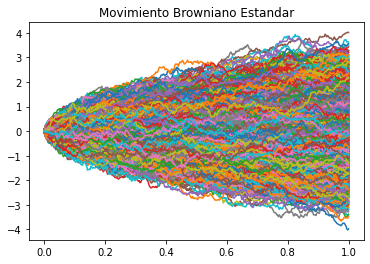

In [4]:
mb = MBEU(trayectorias,puntos)
for i in range(len(mb)):
  plt.plot(t, mb[i, :])
plt.title('Movimiento Browniano Estandar')
plt.show()

$\textbf{Movimiento Browniano Drift}$

In [15]:
def DRIFT(numTrayectorias,numPuntos,mu,sigma):
  mb = MBEU(numTrayectorias, numPuntos)
  dr = np.zeros((numTrayectorias, numPuntos+1))
  t= np.linspace(0,1,numPuntos+1)

  for i in range(numTrayectorias):
    for j in range(numPuntos+1):
      dr[i,j] = mu*t[j] + sigma*mb[i,j]
  return dr

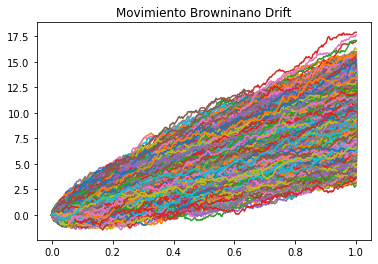

In [16]:
mu = 10
sigma = 2
dr = DRIFT(trayectorias, puntos, mu, sigma)
for i in range(len(dr)):
  plt.plot(t, dr[i, :])
plt.title('Movimiento Browninano Drift')
plt.show()

1.   (a) La medida de centralidad (valor esperado) de dispersión (varianza) y de dispersión conjunta (covarianza). Para ello compare cada una de las propiedades estadísticas teóricas solicitadas con las empíricas.
2.   (b) Si son o no procesos Gaussianos.
3.   (c) Si son o no Movimientos Brownianos Estándar.

Media teorica = 5.013698630136986 Media simulada = 5.025722018418862
Varianza teorica = 2.0054794520547947 Varianza simulada = 1.9929516816117099
Covarianza teorica = 0.2191780821917808 , Covarianza simulada = 0.21426202084996893


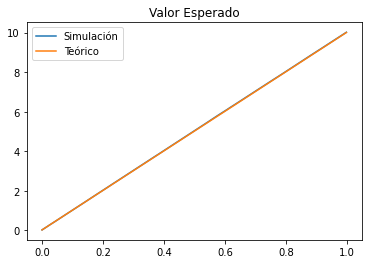

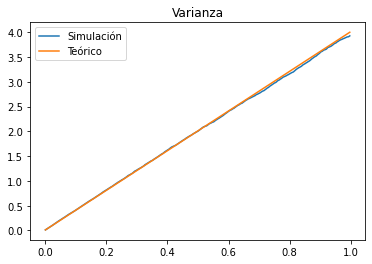

In [17]:
medias_e_dr = [] # Media experimental del Movimiento Browniano Drift
medias_t_dr = [] # Media teorica del Movimiento Browniano Drift
varianzas_e_dr = [] # Varianza experimental del Movimiento Browniano Drift
varianzas_t_dr = [] # Varianza teorica del Movimiento Browniano Drift

for i in range(1, puntos+1):
  medias_t_dr.append(mu*(i*delta_t))
  medias_e_dr.append(np.mean(dr[:, i]))
  varianzas_t_dr.append((sigma**2)*(i*delta_t))
  varianzas_e_dr.append(np.var(dr[:, i]))

t_rand = random.randrange(1, puntos + 1)
s_rand = random.randrange(1, puntos + 1)

covarianza_dr = np.cov(dr[:,t_rand-1], dr[:, s_rand-1])
covarianza_e_dr = covarianza_dr[0][1]
covarianza_t_dr = (sigma**2)*np.minimum(s_rand*delta_t, t_rand*delta_t)

print('Media teorica =', np.mean(medias_t_dr), 'Media simulada =', np.mean(medias_e_dr))
print('Varianza teorica =', np.mean(varianzas_t_dr), "Varianza simulada =",np.mean(varianzas_e_dr))
print('Covarianza teorica =', covarianza_t_dr,', Covarianza simulada =', covarianza_e_dr)

fig3 = plt.figure()
t_aux2 = list(np.arange(0,1, delta_t))
plt.plot(t_aux2, medias_e_dr, label="Simulación")
plt.plot(t_aux2, medias_t_dr,label= 'Teórico')
plt.legend()
plt.title("Valor Esperado")
plt.show()

fig4 = plt.figure()
plt.plot(t_aux2, varianzas_e_dr, label="Simulación")
plt.plot(t_aux2, varianzas_t_dr,label='Teórico')
plt.legend()
plt.title("Varianza")
plt.show()

>Como podemos evidenciar el valor esperado, la varianza y la covarianza se ajustan de manera adecuada a las teóricas.

¿Es un proceso Gaussiano?

In [19]:
normalidad=0
for i in range(puntos+1):
  stat, prob= st.jarque_bera(dr[:,i])
  if prob>0.05:
    normalidad+=1
print('Porcentaje de instantes de tiempo normales',normalidad*100/puntos,"%")

Porcentaje de instantes de tiempo normales 99.72602739726027 %


>En este caso podemos concluir que si es un proceso Gaussiano, pues más del 99.72% de los instantes de tiempo son normales.

¿Es un Movimiento Browniano Estandar?

In [20]:
medias_dr = []
for i in range(1, puntos+1): 
  medias_dr.append(np.mean(dr[:, i]))
print('Promedio de las esperanzas del MBD:', np.mean(medias_dr))

Promedio de las esperanzas del MBD: 5.025722018418862


>El promedio de las esperanzas está lejos de ser 0. Por lo tanto, no se cumple que **E(Wt) = 0**. Entonces el Movimiento Browniano Drift no es un MBE.